In [1]:
	
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
g = 9.81
L=1

In [3]:
h = 0.01
t = np.arange(0,3+h,h)

In [4]:
def Integrator2(f, r0, t):
    h = t[1] - t[0]

    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    theta[0] = r0[0]
    omega[0] = r0[1]

    K1 = np.zeros(2)
    K2 = np.zeros(2)

    for i in range(1, len(t)):
        R = np.array([theta[i - 1], omega[i - 1]])
        K1 = f(R, t[i - 1])

        R = np.array([theta[i - 1] + h * K1[0], omega[i - 1] + h * K1[1]])
        K2 = f(R, t[i - 1] + h)

        theta[i] = theta[i - 1] + 0.5 * h * (K1[0] + K2[0])
        omega[i] = omega[i - 1] + 0.5 * h * (K1[1] + K2[1])

    return theta, omega, t

In [19]:
def System(r,v):
    
    theta,omega = r
    
    dthetadt = omega
    dvthetadt = ((2*(g/L)-(dthetadt**2)*np.cos(theta))*np.sin(theta))/((1/3)+((np.sin(theta))**2))
    
    return [dthetadt,dvthetadt]

In [84]:
r0 = [np.radians(10), 0]
sistema = Integrator2(System, r0, t)
thetas=sistema[0]

x=[]
y=[]
i=0
for theta in thetas:
    
    if theta>0 and theta<= np.pi/2:
        x.append(0.5 * np.sin(theta))
        y.append(0.5 * np.cos(theta))
      
    if thetas[i-1]<=np.pi/2 and theta>= np.pi/2:
        print ("El tiempo que se demora es "+str(t[i]))
        
    i+=1

El tiempo que se demora es 0.52


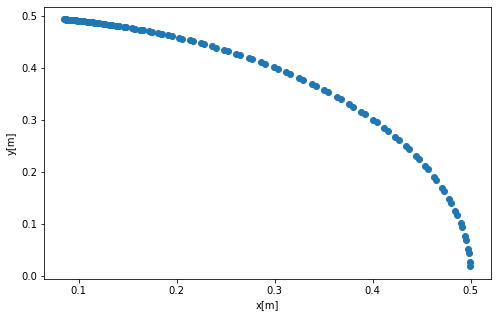

In [77]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(111)

ax1.set_xlabel("x[m]") 
ax1.set_ylabel("y[m]") 

ax1.scatter(x,y)